<a href="https://colab.research.google.com/github/giorgiobonetta/Delta-Technology/blob/main/Montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monte Carlo Option Price: 10.333008927360211


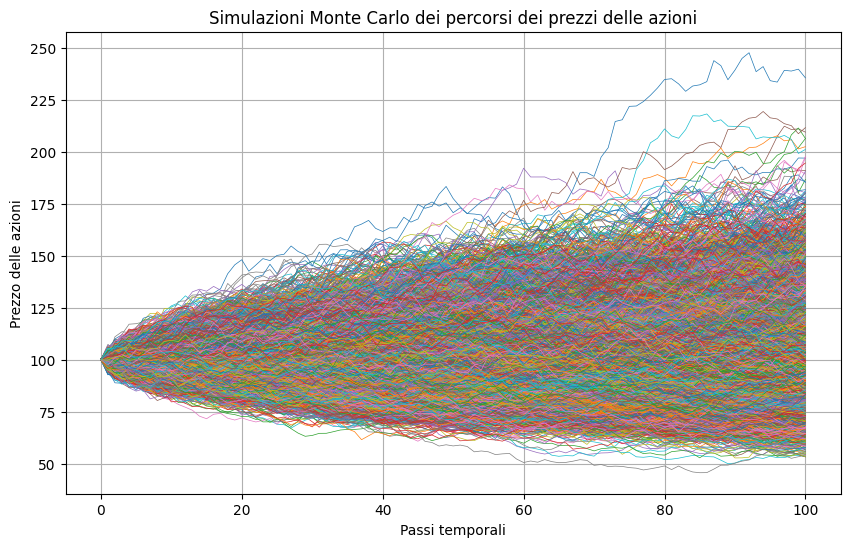

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_option_pricing(S0, K, T, r, sigma, n_simulations, n_steps):
    dt = T / n_steps
    discount_factor = np.exp(-r * T)

    # Simulation of pricing path
    price_paths = np.zeros((n_simulations, n_steps + 1))
    price_paths[:, 0] = S0

    for t in range(1, n_steps + 1):
        z = np.random.standard_normal(n_simulations)
        price_paths[:, t] = price_paths[:, t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)

    # payoff
    payoff = np.maximum(price_paths[:, -1] - K, 0)

    # option pricing
    option_price = discount_factor * np.mean(payoff)

    return option_price, price_paths

# data
S0 = 100  # Prezzo iniziale dell'azione
K = 100   # Strike Price
T = 1     # expiration time (y)
r = 0.05  # risk-free rate
sigma = 0.2  # Volatility
n_simulations = 10000  # NUmber of Simulation
n_steps = 100  # Step

mc_price, price_paths = monte_carlo_option_pricing(S0, K, T, r, sigma, n_simulations, n_steps)
print(f"Monte Carlo Option Price: {mc_price}")

# Creazione del grafico
plt.figure(figsize=(10, 6))
for i in range(n_simulations):
    plt.plot(price_paths[i, :], lw=0.5)
plt.title('Montecarlo simulation')
plt.xlabel('step')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()